Merging both dataframes

In [46]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("Data/X_train_update.csv", index_col = 0)
df1.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [2]:
df2 = pd.read_csv("Data/Y_train_CVw08PX.csv", index_col = 0)
df2.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [27]:
df = pd.concat([df1["productid"], df1["imageid"], df2["prdtypecode"]], axis = 1)
df.head()

,productid,imageid,prdtypecode
0,3804725264,1263597046,10
1,436067568,1008141237,2280
2,201115110,938777978,50
3,50418756,457047496,1280
4,278535884,1077757786,2705


In [28]:
codes = sorted(list(set(df2["prdtypecode"].values)))
new_codes = [*range(27)]
df["codes"] = df["prdtypecode"].replace(to_replace = codes, value = new_codes)

In [29]:
df.head()

,productid,imageid,prdtypecode,codes
0,3804725264,1263597046,10,0
1,436067568,1008141237,2280,18
2,201115110,938777978,50,2
3,50418756,457047496,1280,7
4,278535884,1077757786,2705,25


In [30]:
df["img"] = df.astype("str").apply(lambda row: "image_" + row["imageid"]+ "_product_" + row["productid"] + ".jpg", axis=1)
df.head()

,productid,imageid,prdtypecode,codes,img
0,3804725264,1263597046,10,0,image_1263597046_product_3804725264.jpg
1,436067568,1008141237,2280,18,image_1008141237_product_436067568.jpg
2,201115110,938777978,50,2,image_938777978_product_201115110.jpg
3,50418756,457047496,1280,7,image_457047496_product_50418756.jpg
4,278535884,1077757786,2705,25,image_1077757786_product_278535884.jpg


In [13]:
from PIL import Image 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import os
import math
import cv2

#Select the destination of the images
image_path = 'image_train/'

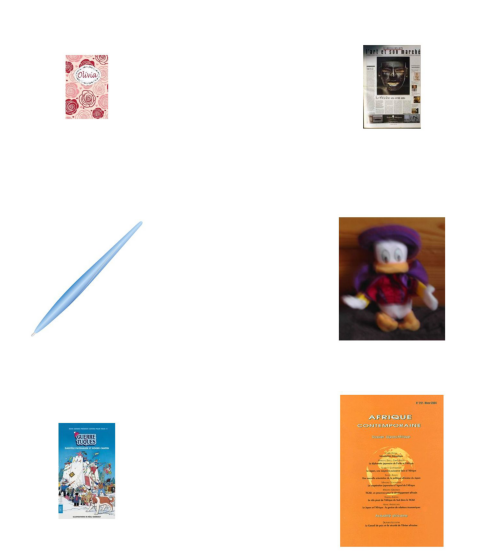

In [8]:
#Visually inspect the images

number_of_images = 6 #Définir le nombre x d'images à afficher 
plt.figure(figsize=(10,10))
images = os.listdir(image_path)[:number_of_images] # Selectionner aléatoirement x images
c

In [31]:
# Drop the rows with empty images
df = df.drop(index=[37124, 52327, 79708, 80859])

In [11]:
# Function for determining the largest container out of all detected boundary boxes

list_dim_bb = []

def contouring(imag):
    
    """
    Input: image string
    Output: List with boundary box coordinates
    
    """
    
    img_0 = cv2.imread(image_path + imag)
    gray_image = cv2.cvtColor(img_0, cv2.COLOR_BGR2GRAY)
    thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    size = 500
    r, l, t, b = 0, 0, 0, 0
    x, y, w, h = 0, 0, 0, 0
    tup = ()
    right, left, top, bottom = [], [], [], []
    if len(contours) < 3:
        for i in contours:
            x,y,w,h = cv2.boundingRect(i)
        #cv2.rectangle(img_0, (x, y), (x + w, y + h), (255,0,0), 4)
        list_dim_bb = [x, x+w, y, y+h]
    
    else:
        for i in contours:
            x,y,w,h = cv2.boundingRect(i)
            l = x
            r = l + w
            t = y
            b = t + h
            right.append(r)
            top.append(t)
            left.append(l)
            bottom.append(b)
            
        x = min(left)
        y = min(top)
        w = (max(right)-min(left))
        h = (max(bottom)-min(top))
        list_dim_bb = [x, x+w, y, y+h]
    # Draw the contour
    #return cv2.imwrite(image_path + 'bb/' + imag, img_0)
    return list_dim_bb

In [12]:
#Iterate over every image and determine the list with the dimensions
# It takes a while to process

res_list = []
for el in df["img"]:
    res_list.append(contouring(el))

In [32]:
x1, x2, y1, y2 = [], [], [], []

#Iterate over the list and append the values corresponding to each image
for it in res_list:
    x1.append(it[0])
    x2.append(it[1])
    y1.append(it[2])
    y2.append(it[3])

In [33]:
#Create the columns corresponding to those attributes
df["x1"] = x1
df["x2"] = x2
df["y1"] = y1
df["y2"] = y2

In [34]:
df.head()

,productid,imageid,prdtypecode,codes,img,x1,x2,y1,y2
0,3804725264,1263597046,10,0,image_1263597046_product_3804725264.jpg,183,316,150,350
1,436067568,1008141237,2280,18,image_1008141237_product_436067568.jpg,160,340,119,380
2,201115110,938777978,50,2,image_938777978_product_201115110.jpg,75,424,70,428
3,50418756,457047496,1280,7,image_457047496_product_50418756.jpg,84,416,57,442
4,278535884,1077757786,2705,25,image_1077757786_product_278535884.jpg,161,338,100,395


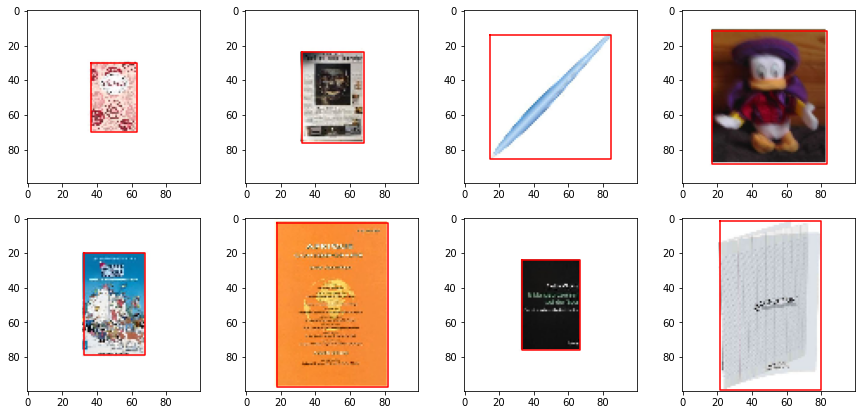

In [51]:
# Check if the dimensions are right
plt.figure(figsize=(15,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    img = cv2.imread(image_path+df.img[i])
    img_shape = img.shape
    img = cv2.resize(img,(100,100))
    plt.imshow(img[...,::-1])
    x1 = df.x1[i]/img_shape[1]*100
    x2 = df.x2[i]/img_shape[1]*100
    y1 = df.y1[i]/img_shape[0]*100
    y2 = df.y2[i]/img_shape[0]*100
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],"r")
plt.show()

### Image processing

In [35]:
# Identify images without a bounding box (same colour)
df.loc[(df["x2"] == 0) | (df["y2"] == 0)]

,productid,imageid,prdtypecode,codes,img,x1,x2,y1,y2
29955,3921649686,1263803373,2060,16,image_1263803373_product_3921649686.jpg,0,0,0,0
40000,3921650416,1263803707,2060,16,image_1263803707_product_3921650416.jpg,0,0,0,0
82267,3921650414,1263803704,2060,16,image_1263803704_product_3921650414.jpg,0,0,0,0


In [36]:
df.loc[29955,("x2", "y2")] = 500
df.loc[40000,("x2", "y2")] = 500
df.loc[82267,("x2", "y2")] = 500

In [ ]:
#Saving that dataframe into a CSV to use during image processing
df.to_csv(r'images_w_bounding_box.csv', index = False)

In [37]:
df = df.drop(["productid", "imageid", "prdtypecode"], axis = 1)

In [38]:
df.head()

,codes,img,x1,x2,y1,y2
0,0,image_1263597046_product_3804725264.jpg,183,316,150,350
1,18,image_1008141237_product_436067568.jpg,160,340,119,380
2,2,image_938777978_product_201115110.jpg,75,424,70,428
3,7,image_457047496_product_50418756.jpg,84,416,57,442
4,25,image_1077757786_product_278535884.jpg,161,338,100,395


In [40]:
# Store the dataframe to work with in data
data = df

In [42]:
from tqdm import tqdm

In [44]:
# Create a function to load all images
def load_data(data):
    img_list = []
    label_list = []
    for i, f in enumerate(data.values):
        img = cv2.imread("image_train/"+f[1])
        img = img[f[4]:f[5],f[2]:f[3]]
        img = cv2.resize(img,(100,100))
        img_list.append(img) 
        #if i%100 == 0:
         #   print(i)        
    return np.array(img_list)


In [47]:
X = load_data(data)

In [48]:
Y = data["codes"]

In [52]:
X.shape

(84912, 100, 100, 3)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.2)

In [55]:
# In order to avoid the effect of the imbalanced data sets, a weighting
# will be implemented to penalize the error on smaller-sized classes

from sklearn.utils import compute_class_weight

class_weight = compute_class_weight(
                                    class_weight = "balanced",
                                    classes = np.unique(y_train),
                                    y = y_train                                                    
                                    )
class_weight = dict(zip(np.unique(y_train), class_weight))

In [56]:
import keras

In [57]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from keras.models import Model, Sequential, load_model
from keras.optimizers import SGD, Adam, RMSprop


In [58]:
model = Sequential()
# Part 1
model.add(Conv2D(64, (2, 2), activation='relu', padding='same', input_shape=[100,100,3]))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Part 2
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Part 3
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(27, activation='softmax'))

# Loss function 
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['acc'])

2022-11-19 21:18:11.865934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                        

In [ ]:
history = model.fit((X_train/255), y_train, validation_data=((X_test/255), y_test), verbose=1, batch_size=16, epochs=10, class_weight = class_weight)

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [ ]:
y_pred = model.predict(X_test/255)

In [ ]:
y_pred_class = np.argmax(y_pred, axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred_class))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm
import matplotlib.pyplot as plt

In [ ]:
# Plot the confussion matrix
plt.figure(figsize = (30, 30))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_1, xticks_rotation='vertical', cmap = plt.cm.Blues)
fig = cm_display.ax_.get_figure()
fig.set_figwidth(20)
fig.set_figheight(20)

In [ ]:
# Save the probabilities of belonging to a class
probability_image = model.predict(X/255)
df_probabilities.to_csv(r'probabilities.csv', index = False)

In [ ]:
import pickle

In [ ]:
#Save the model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))